# F1 Score

F1 score is a method for quantifying the performance of a model. It is typically used for binarcy classification but F1 score can be extended to multiclass problems as well.

In [4]:
%pip install numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

Let us create a toy dataset classifying two gaussian distributions.

In [31]:
n = 50
x = np.concatenate([
    np.random.normal([1, 0], 1, size=(n, 2)),
    np.random.normal([-1, 0], 1, size=(n, 2))
])
y = np.asarray([0] * n + [1] * n)

Plot `x` and `y`.

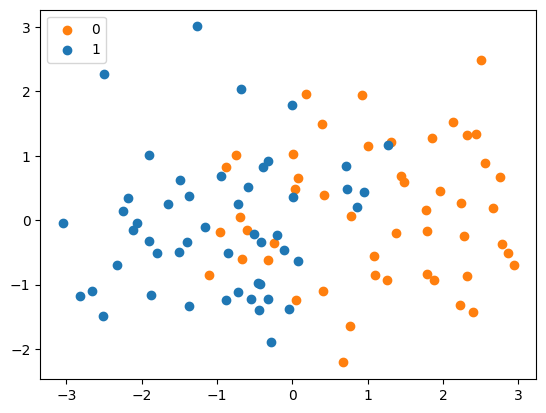

In [32]:
plt.scatter(x[:n, 0], x[:n, 1], color="tab:orange", label=0)
plt.scatter(x[n:, 0], x[n:, 1], color="tab:blue", label=1)
plt.legend()

Let us train a logistic regression model on this data.

In [36]:
model = linear_model.LogisticRegression()
model.fit(x, y)
y_hat = model.predict(x)

Plot the predictions and the true labels.

Text(0.5, 1.0, 'Predictions')

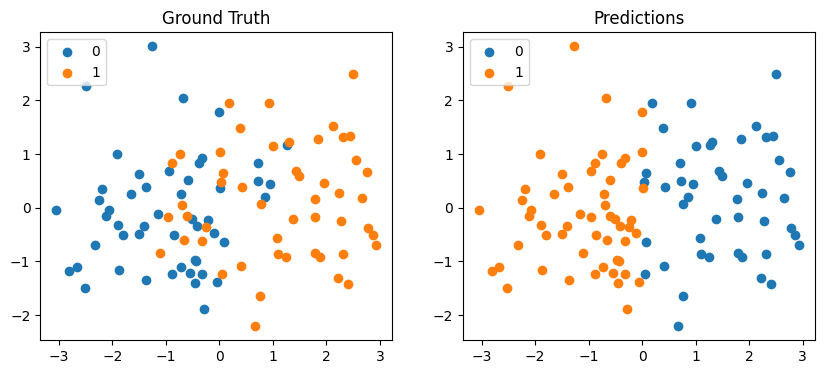

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x[n:, 0], x[n:, 1], label=0)
ax[0].scatter(x[:n, 0], x[:n, 1], label=1)
ax[0].legend()
ax[0].set_title("Ground Truth")

ax[1].scatter(x[y_hat == 0, 0], x[y_hat == 0, 1], label=0)
ax[1].scatter(x[y_hat == 1, 0], x[y_hat == 1, 1], label=1)
ax[1].legend()
ax[1].set_title("Predictions")

The model clearly gets several predictions wrong. We can break our predictions, `y_hat`, down into for categories:

1. `y_hat` is 1 and `y_hat` is 1 (true positive).
2. `y_hat` is 1 and `y_hat` is 0 (false negative).
3. `y_hat` is 0 and `y_hat` is 1 (false positive).
4. `y_hat` is 0 and `y_hat` is 0 (true negative).

Let us calculate these quantitites for our model.

In [54]:
true_pos = np.sum((y == 1) & (y_hat == 1))
true_neg = np.sum((y == 0) & (y_hat == 0))
false_pos = np.sum((y == 0) & (y_hat == 1))
false_neg = np.sum((y == 1) & (y_hat == 0))

print(f"true_pos: {true_pos},  true_neg: {true_neg},  false_pos: {false_pos},  false_neg: {false_neg}")

true_pos: 44,  true_neg: 40,  false_pos: 10,  false_neg: 6


Our model gives mostly true positives and true negatives which is good. When assessing the quality of the model, our appetite for false positives and false negatives may depend on our application. For example:

* If 1 means a patients has a disease and 0 means they don't, we may be more willing to accept false positives than false negatives.

# Precision and Recall

Precisions and recall is a way of comparing the actual results with the predicted results.

$$
\text{precision} = \frac{\text{true positive}}{\text{true positive} + \text{false positive}}, \quad
\text{recall} = \frac{\text{true positive}}{\text{true positive} + \text{false negative}}
$$

* Precision is the proportion of positive predictions that were actually positive.
* Recall is the proportion of actual positives that were predicted to be positive.

Let us write functions to calculate precision and recall.

In [59]:
def calculate_precision(y, y_hat):
    true_pos = np.sum((y == 1) & (y_hat == 1))
    false_pos = np.sum((y == 0) & (y_hat == 1))
    return true_pos / (true_pos + false_pos)

def calculate_recall(y, y_hat):
    true_pos = np.sum((y == 1) & (y_hat == 1))
    false_neg = np.sum((y == 1) & (y_hat == 0))
    return true_pos / (true_pos + false_neg)

precision = calculate_precision(y, y_hat)
recall = calculate_recall(y, y_hat)

print(f"Precision: {precision},  Recall: {recall}")

Precision: 0.8148148148148148,  Recall: 0.88


Precisions would be 1 if we had 0 false positives. Recall would be 1 if we had 0 false negatives.

# F1 Score

F1 score is the harmonic mean of precision and recall. Let us first recall the definition of harmonic mean. Suppose we have a sequence of numbers $x_1, x_2, \dots, x_n$. The harmonic mean of this set of numbers is,

$$
\frac{n}{x_1^{-1} + x_2^{-1} + \dots + x_n^{-1}}
$$

So, the harmonic mean of precision and recall (F1 score) is,

$$
F1 = \frac{2}{\text{precision}^{-1} + \text{recall}^{-1}} = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{\text{2 tp}}{\text{2 tp} + fp + fn}
$$

Let us write a function for calculate the F1 score.

In [62]:
def calculate_f1(y, y_hat):
    recall = calculate_recall(y, y_hat)
    precision = calculate_precision(y, y_hat)
    return 2 * (precision * recall) / (precision + recall)

f1_score = calculate_f1(y, y_hat)
print(f"F1 score: {f1_score}")

F1 score: 0.8461538461538461


Why is the harmonic mean used when calculating f1 score as opposed to the arithmetic mean?